In [1]:
# this notebook aimint to understand gridsearch in ml
# focused on grid search process not data preprocessing
# checkout my other notebooks on this topic if you want

# author   : Enes Çavuş
# date     : July 2021
# subject  : Better Understanding of Grid Search

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os
import numpy as np
import warnings
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
data = pd.read_csv("datasets/winequality-red.csv", sep=";")
data = shuffle(data)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5
788,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,6
1422,7.0,0.540,0.00,2.1,0.079,39.0,55.0,0.99560,3.39,0.84,11.4,6
426,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
406,9.8,0.440,0.47,2.5,0.063,9.0,28.0,0.99810,3.24,0.65,10.8,6
421,6.6,0.840,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3,7
1367,6.9,0.540,0.30,2.2,0.088,9.0,105.0,0.99725,3.25,1.18,10.5,6
992,6.5,0.400,0.10,2.0,0.076,30.0,47.0,0.99554,3.36,0.48,9.4,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 834 to 187
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [6]:
X = data.drop(columns=["quality"])
y = data["quality"]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5
788,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1
1422,7.0,0.540,0.00,2.1,0.079,39.0,55.0,0.99560,3.39,0.84,11.4
426,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
...,...,...,...,...,...,...,...,...,...,...,...
406,9.8,0.440,0.47,2.5,0.063,9.0,28.0,0.99810,3.24,0.65,10.8
421,6.6,0.840,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3
1367,6.9,0.540,0.30,2.2,0.088,9.0,105.0,0.99725,3.25,1.18,10.5
992,6.5,0.400,0.10,2.0,0.076,30.0,47.0,0.99554,3.36,0.48,9.4


In [7]:
y

834     5
1131    5
788     6
1422    6
426     6
       ..
406     6
421     7
1367    6
992     6
187     5
Name: quality, Length: 1599, dtype: int64

In [8]:
data = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn import svm
classifier = svm.LinearSVC(C=1.0, class_weight="balanced")

In [11]:
# train the model on train set
model = svm.SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.56      0.40      0.46       129
           6       0.46      0.77      0.58       137
           7       0.00      0.00      0.00        38
           8       0.00      0.00      0.00         2

    accuracy                           0.49       320
   macro avg       0.17      0.19      0.17       320
weighted avg       0.42      0.49      0.43       320



In [12]:
# train the model on train set
model = svm.LinearSVC(C=1.0, class_weight="balanced")
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.08      0.12        13
           5       0.72      0.22      0.34       129
           6       0.49      0.84      0.62       137
           7       0.54      0.37      0.44        38
           8       0.00      0.00      0.00         2

    accuracy                           0.50       320
   macro avg       0.33      0.25      0.25       320
weighted avg       0.58      0.50      0.46       320



In [13]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.434 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.434 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.430 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.430 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.431 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.434 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.434 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.430 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.434 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.431 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.520 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.523 total time=   0.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.555 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.531 total time=   0.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.533 total time=   1.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.570 total time=   0.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.555 total time=   0.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.586 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.543 total time=   0.5s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [14]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [15]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [16]:
# train the model on train set
model = svm.SVC(C=1000, gamma=0.001, kernel='rbf')
model.fit(X_train, y_train,)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.65      0.76      0.70       129
           6       0.62      0.64      0.63       137
           7       0.62      0.34      0.44        38
           8       0.00      0.00      0.00         2

    accuracy                           0.62       320
   macro avg       0.31      0.29      0.29       320
weighted avg       0.60      0.62      0.60       320



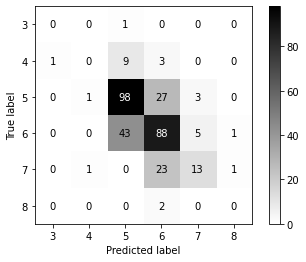

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve # recall curve icin binary classifier gerekli

plot_confusion_matrix(model, X_test, y_test, cmap='binary')
plt.show()

# DECISON TREE CLASSIFIRER GRIDCV

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# print prediction results
predictions = dt.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.08      0.09        13
           5       0.67      0.71      0.69       129
           6       0.67      0.63      0.65       137
           7       0.51      0.55      0.53        38
           8       0.00      0.00      0.00         2

    accuracy                           0.62       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.62      0.62      0.62       320



In [19]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1)
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [20]:
grid_dt.best_params_

{'max_leaf_nodes': 46, 'min_samples_split': 2}

In [21]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=46, random_state=42)

In [22]:
gridCdt = DecisionTreeClassifier(max_leaf_nodes=16, min_samples_split=2, splitter='random', random_state=42)
gridCdt.fit(X_train,y_train)

# print scores
acc = gridCdt.score(X_test,y_test)
print("Accuracy : " , 100 * acc)
predics = gridCdt.predict(X_test)
print(classification_report(y_test, predics))

Accuracy :  55.625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.57      0.86      0.68       129
           6       0.57      0.39      0.46       137
           7       0.45      0.37      0.41        38
           8       0.00      0.00      0.00         2

    accuracy                           0.56       320
   macro avg       0.26      0.27      0.26       320
weighted avg       0.53      0.56      0.52       320



Accuracy: 63.125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.08      0.08        13
           5       0.69      0.71      0.70       129
           6       0.67      0.66      0.66       137
           7       0.54      0.53      0.53        38
           8       0.00      0.00      0.00         2

    accuracy                           0.63       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.63      0.63       320




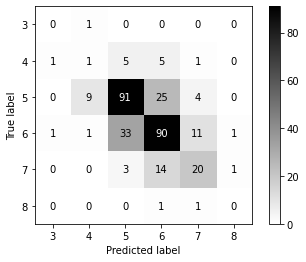

In [23]:
dt=DecisionTreeClassifier()

#train
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

a = dt.score(X_test, y_test)

print("Accuracy:", a * 100)
print(classification_report(y_test, y_pred))

print()

cm_aaa = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(dt, X_test, y_test, cmap='binary')
plt.show()

In [24]:
# checkout other notebook to see explanations about these common machine learning process
# this notebook has not commented out 

In [25]:
# Enes Çavuş - Understanding Grid 